## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization, and unit vector normalization in Python
* Identify appropriate normalization and scaling techniques for a given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables (`'RAD'` and `'TAX'`) and deleted the `'NOX'` (nitride oxide concentration) variable because it was highly correlated with two other features.

In [39]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD', 'TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop('NOX', axis=1)

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
df = boston_features
boston_cont = df[df.columns.drop(list(df.filter(regex='TAX')))]
boston_cont = boston_cont[boston_cont.columns.drop(list(boston_cont.filter(regex='RAD')))]
boston_cont = boston_cont.drop(['CHAS'], axis=1)

## Look at the histograms for the continuous variables

In [36]:
# Your code here
# df_logger=boston_features[['CRIM','DIS','PTRATIO','LSTAT']]
df_logger.head(100)

,CRIM,DIS,PTRATIO,LSTAT
0,NaN,NaN,-5.652530,NaN
1,NaN,NaN,-2.883852,NaN
2,NaN,NaN,-2.883852,NaN
3,NaN,NaN,-2.633120,NaN
4,NaN,NaN,-2.633120,NaN
5,NaN,NaN,-2.633120,NaN
6,NaN,NaN,-6.805728,NaN
7,NaN,NaN,-6.805728,-2.533860
8,NaN,NaN,-6.805728,-1.601138
9,NaN,NaN,-6.805728,-3.156821


## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the `'ZN'` feature?  

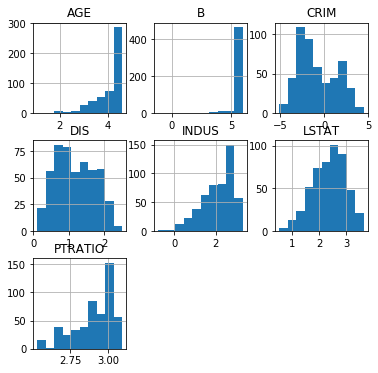

In [41]:
import numpy as np
data_log= pd.DataFrame([])
data_log['AGE'] = np.log(boston_cont['AGE'])
data_log['B'] = np.log(boston_cont['B'])
data_log['CRIM'] = np.log(boston_cont['CRIM'])
data_log['DIS'] = np.log(boston_cont['DIS'])
data_log['INDUS'] = np.log(boston_cont['INDUS'])
data_log['LSTAT'] = np.log(boston_cont['LSTAT'])
data_log['PTRATIO'] = np.log(boston_cont['PTRATIO'])
data_log.hist(figsize  = [6, 6]);

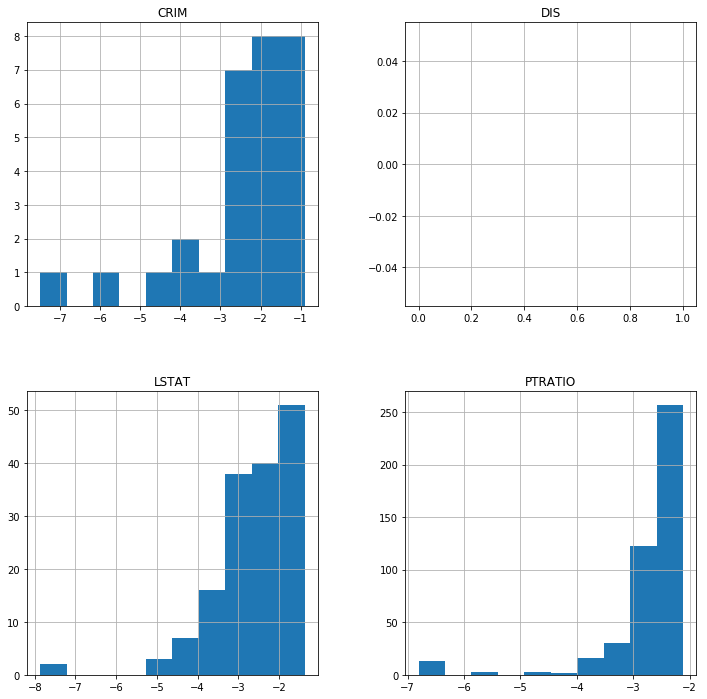

In [38]:
df_logger.hist(figsize=[12,12]);

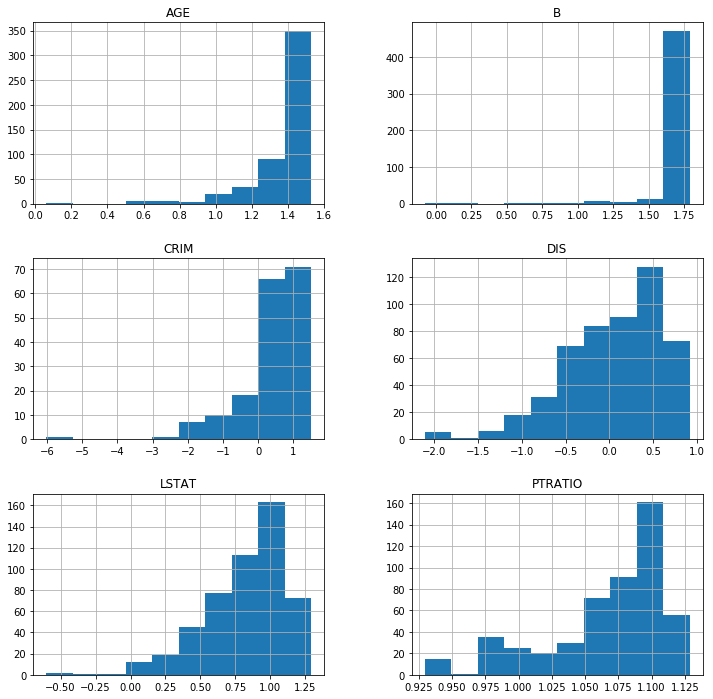

In [22]:
df.hist(figsize=[12,12]);

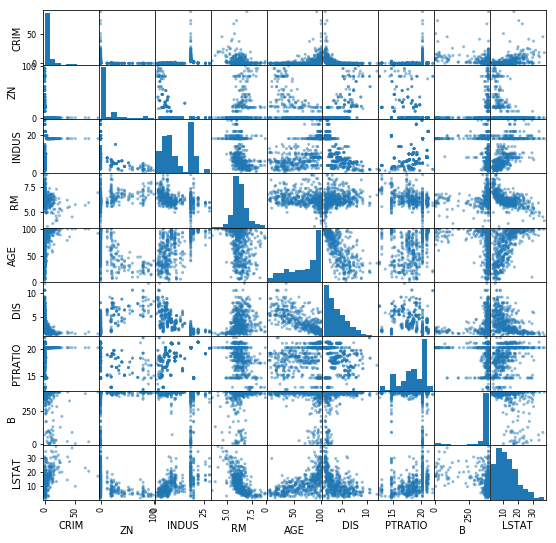

In [14]:
pd.plotting.scatter_matrix(df,figsize  = [9, 9]);
plt.show()

`'ZN'` has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [ ]:
# Your code here

## Try different types of transformations on the continuous variables

Store your final features in a DataFrame `features_final`: 

In [ ]:
# Your code here

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` DataFrame.